In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Data.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
print(x)

[[72000     0]
 [48000     1]
 [45000     0]
 [64000     0]
 [72000     1]
 [56000     1]
 [51000     0]
 [76000     1]
 [81000     0]
 [69000     1]]


In [4]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
print(x_train)

[[69000     1]
 [48000     1]
 [51000     0]
 [76000     1]
 [64000     0]
 [72000     0]
 [56000     1]]


In [7]:
print(x_test)


[[45000     0]
 [81000     0]
 [72000     1]]


In [8]:
print(y_train)

[1 1 0 1 0 0 1]


In [9]:
print(y_test)

[0 0 1]


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
print(x_train)

[[ 0.67074449  0.8660254 ]
 [-1.42711593  0.8660254 ]
 [-1.12742158 -1.15470054]
 [ 1.37003129  0.8660254 ]
 [ 0.17125391 -1.15470054]
 [ 0.97043883 -1.15470054]
 [-0.62793101  0.8660254 ]]


In [12]:
print(x_test)

[[-1.72681028 -1.15470054]
 [ 1.86952187 -1.15470054]
 [ 0.97043883  0.8660254 ]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred = classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 0]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


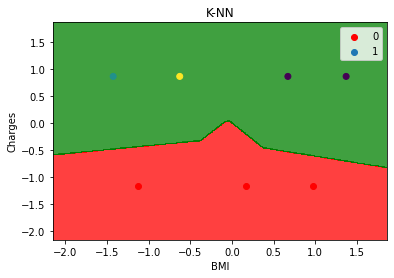

In [16]:

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('K-NN')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


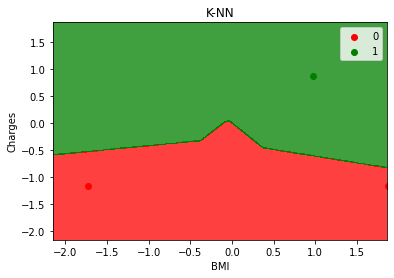

In [17]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.xlim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label = j)
plt.title('K-NN')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()